<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [ ]:
import pandas as pd
import seaborn as sns

%matplotlib inline

project_id = "big-query-ben"

In [47]:
sql_businesses = """
SELECT city, business_id,name , review_count, stars, categories, variable, value
FROM [bigquery-dsi-dave:yelp_arizona.businesses] 
"""
businesses = pd.read_gbq(sql_businesses, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 21.3 Mb

Retrieving results...
  Got page: 1; 29.0% done. Elapsed 9.31 s.
  Got page: 2; 57.0% done. Elapsed 17.07 s.
  Got page: 3; 86.0% done. Elapsed 23.96 s.
  Got page: 4; 100.0% done. Elapsed 27.81 s.
Got 152832 rows.

Total time taken 35.56 s.
Finished at 2016-12-17 11:52:25.


In [798]:
sql_reviews = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
"""
reviews = pd.read_gbq(sql_reviews, project_id=project_id)


Requesting query... ok.
Query running...
  Elapsed 11.7 s. Waiting...
  Elapsed 22.2 s. Waiting...
Query done.
Processed: 277.3 Mb

Retrieving results...
  Got page: 1; 1.0% done. Elapsed 30.97 s.
  Got page: 2; 2.0% done. Elapsed 35.36 s.
  Got page: 3; 3.0% done. Elapsed 39.64 s.
  Got page: 4; 4.0% done. Elapsed 44.92 s.
  Got page: 5; 5.0% done. Elapsed 50.23 s.
  Got page: 6; 6.0% done. Elapsed 54.72 s.
  Got page: 7; 7.0% done. Elapsed 60.01 s.
  Got page: 8; 8.0% done. Elapsed 64.72 s.
  Got page: 9; 9.0% done. Elapsed 70.32 s.
  Got page: 10; 10.0% done. Elapsed 75.15 s.
  Got page: 11; 11.0% done. Elapsed 80.18 s.
  Got page: 12; 12.0% done. Elapsed 86.32 s.
  Got page: 13; 13.0% done. Elapsed 90.89 s.
  Got page: 14; 14.0% done. Elapsed 97.64 s.
  Got page: 15; 15.0% done. Elapsed 102.69 s.
  Got page: 16; 16.0% done. Elapsed 107.65 s.
  Got page: 17; 17.0% done. Elapsed 112.64 s.
  Got page: 18; 18.0% done. Elapsed 118.36 s.
  Got page: 19; 19.0% done. Elapsed 124.18 s.
  Go

In [539]:
sql_users = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 
"""
users = pd.read_gbq(sql_users, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Processed: 15.2 Mb

Retrieving results...
  Got page: 1; 12.0% done. Elapsed 9.52 s.
  Got page: 2; 23.0% done. Elapsed 15.38 s.
  Got page: 3; 35.0% done. Elapsed 20.64 s.
  Got page: 4; 46.0% done. Elapsed 27.22 s.
  Got page: 5; 58.0% done. Elapsed 33.64 s.
  Got page: 6; 69.0% done. Elapsed 40.33 s.
  Got page: 7; 81.0% done. Elapsed 45.21 s.
  Got page: 8; 92.0% done. Elapsed 50.14 s.
  Got page: 9; 100.0% done. Elapsed 56.41 s.
Got 144206 rows.

Total time taken 73.74 s.
Finished at 2016-12-19 19:16:40.


In [ ]:
sql_tips = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.tips] 
"""
tips = pd.read_gbq(sql_tips, project_id=project_id)

In [ ]:
sql_checkins = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.checkins] 
"""
checkins = pd.read_gbq(sql_checkins, project_id=project_id)

In [750]:
print 'businesses:', businesses.shape,
print 'reviews:' , reviews.shape,
print 'users:',  users.shape,
print 'tips:', tips.shape,
print 'checkins:', checkins.shape,

businesses: (152832, 8) reviews: (322398, 111) users: (144206, 22) tips: (1000, 104) checkins: (1000, 3)


In [541]:
businesses_backup = businesses
reviews_backup = reviews
tips_backup = tips
users_backup = users
checkins_backup = checkins

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [751]:
businesses.variable = businesses.variable.map(lambda x : x.replace('attributes.','a.'))
businesses.value = businesses.value.map(lambda x : 1 if x else 0)

In [752]:
cols = ['business_id', 'name', 'review_count', 'city', 'stars', 'categories']
businesses_wide = pd.pivot_table(businesses, values='value', columns='variable', index=cols, fill_value=False).reset_index()

In [753]:
businesses_wide.head()

variable,business_id,name,review_count,city,stars,categories,a.Accepts Credit Cards,a.Accepts Insurance,a.Ages Allowed,a.Alcohol,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,"['Burgers', 'Fast Food', 'Restaurants']",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,3.5,"['Bars', 'Nightlife', 'Lounges']",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,Phoenix,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,Phoenix,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [776]:
def expand_categories(row):

    for category in eval(row['categories']):
        row["cat_" + category.replace(" ", "_").lower()] = 1
        
    return row

businesses_wide = businesses_wide.apply(expand_categories, axis=1)

In [779]:
businesses_wide.isnull().sum()[businesses_wide.isnull().sum() > 0]

Series([], dtype: int64)

In [778]:
for x in businesses_wide.columns :
    businesses_wide[x].fillna(0,inplace= True)

In [84]:
## smart code for using getdummies but it dosnt work properly
##df = businesases.categories.map(lambda x: ''.join([y for y in x if not y in "[]'\""])).str.get_dummies(', ')


In [780]:
businesses_wide['isvegas'] = businesses_wide.city.apply(lambda x : 1 if x == 'Las Vegas' else 0)
X = businesses_wide[[x for x in businesses_wide if not x in ['city','isvegas', 'name','categories', 'business_id']]]
y = businesses_wide.isvegas

In [781]:
print X.shape,y.shape

(4132, 290) (4132,)


In [783]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [784]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import grid_search, datasets

search_parameters = {
    'n_neighbors':  range(1,100), 
    'weights':      ['uniform', 'distance']    
}

knn = KNeighborsClassifier()

estimator = grid_search.GridSearchCV(knn, search_parameters, cv=10)

estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test)
score = estimator.score(X_test,y_test)
score

0.62096774193548387

In [785]:
from sklearn.metrics import classification_report

def print_cm_cr(y, predictions):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print confusion
    print
    print classification_report(y, predictions)


print_cm_cr(y_test, predictions)

Predicted   0     1   All
Actual                   
0          36   480   516
1          37   811   848
All        73  1291  1364

             precision    recall  f1-score   support

          0       0.49      0.07      0.12       516
          1       0.63      0.96      0.76       848

avg / total       0.58      0.62      0.52      1364



In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

In [786]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.001, 100, 10)
}

lr_22 = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_22.fit(X_train, y_train)
#best_lr = lr_gs.best_estimator_
best_lr = lr_22.best_estimator_

predictions = best_lr.predict(X_test)

score = best_lr.score(X_test,y_test)
score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished


0.70014662756598245

In [787]:
print 'Baseline accuracy:', np.mean(y)

Baseline accuracy: 0.621974830591


In [788]:
coefs = pd.DataFrame({'coef':best_lr.coef_[0], 'abs_coef':np.abs(best_lr.coef_[0]),
                      'variable':[x for x in businesses_wide if not x in ['city','isvegas', 'name','categories', 'business_id']]})
coefs.sort_values('abs_coef', ascending=False, inplace=True)

In [789]:
coefs[:20]

,abs_coef,coef,variable
57,4.652326,4.652326,a.Smoking
216,4.409766,4.409766,cat_pilates
146,2.930250,-2.930250,cat_fish_&_chips
257,2.734587,2.734587,cat_thai
64,2.712852,2.712852,cat_adult_entertainment
233,2.684643,2.684643,cat_skin_care
168,2.573987,2.573987,cat_hawaiian
188,2.536599,-2.536599,cat_latin_american
235,2.498405,2.498405,cat_soul_food
178,2.490701,2.490701,cat_irish_pub


###  <center> LAS VEGAS PROFILE </center>

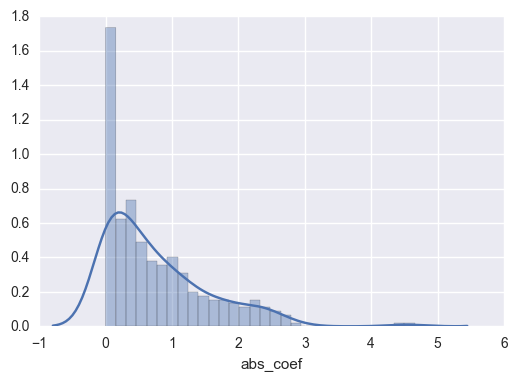

In [790]:
sns.distplot(coefs.abs_coef,bins=30)

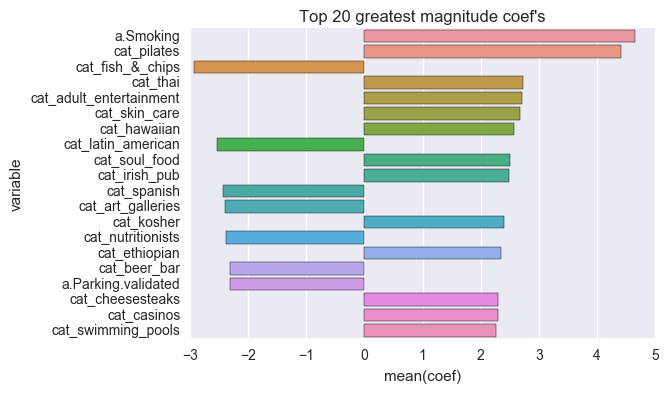

In [791]:
import matplotlib.pyplot as plt
sns.barplot(x= 'coef', y = 'variable', data = coefs[:20])
plt.title("Top 20 greatest magnitude coef's")
plt.show()

### Conclusion : 
The top 20 coefs show that, as we know Las Vegas as a "Sin City", most people are there for fun and adventure. 

People are more interested in massage, pilates, skin care, swiming pools and differenet cuisines (becauese there is a huge diversity of people), rather than healthy food, gym, phisical therapy or dietary. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [800]:
reviews.minutes_30 = reviews.minutes_30.apply(int)

In [802]:
not_review_columns = ['user_id','review_id', 'votes_cool', 'business_id', 'votes_funny', 'stars','date','votes_useful', 
                      'service_total', 'non_service_total', 'aboutservie'  ]

service_columns = ['customer_service', 'service_excellent', 'service_food', 'service_friendly', 'service_good', 
                  'service_great', 'staff_friendly', 'super_friendly','great_service', 'food_service',
                  'minutes_10', 'minutes_15', 'minutes_20', 'minutes_30', 'friendly_staff','good_service',
                  'great_atmosphere', 'great_experience', 'great_place', 'great_time', 'good_place', 'good_thing', 
                  'good_time','bottle_service','didn_want','minutes_later','wait_staff','like_place', 'love_place',
                   'place_good', 'place_just', 'recommend_place', 
                  
                  'wait_staff', 'dance_floor', 'don_know', 'don_like','don_think','don_want','feel_like','felt_like',
                  'friday_night','happy_hour','just_like','just_ok', 'just_right', 'late_night', 'really_enjoyed',
                  'really_good', 'really_like', 'really_nice','ve_seen', 've_tried']

non_service_columns = [x for x in reviews.columns if not x in not_review_columns+service_columns]

In [803]:
def sumofrow(row) :
    total = 0
    for x in service_columns :
        total += row[x]
    return total

reviews['service_total'] = reviews.apply(sumofrow, axis=1)

In [178]:
def sumofrow(row) :
    total = 0
    for x in non_service_columns :
        total += row[x]
    return total

reviews['non_service_total'] = reviews.apply(sumofrow, axis=1)

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [183]:
def isaboutservice(row) :
    for x in row :
        if row['service_total'] > row['non_service_total'] :
            return 1
        else :
            return 0 

reviews['aboutservie'] = reviews.apply(isaboutservice, axis =1)

In [185]:
reviews.head(10)

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,service_total,non_service_total,aboutservie
0,Z4W_tm-Je2u3EGio02Nw3A,GSkONgGaDj1m9YjQMG6Ehw,0,lidcKZMOzz9M2p7-SznZcA,0,5,2015-06-28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,O51NIQFahZcrzKTlDcOqxg,A1WPhx0KYoDgbXNSrMAJCA,0,lidcKZMOzz9M2p7-SznZcA,0,5,2015-11-28,0,0,0,...,0,0,0,0,0,0,0,3,1,1
2,bCDxddGgv-nU_f6ibEd1nw,pa5x-w6sbYLtDUl9EYBN7g,0,xV3OGVeNZyARob-L1SSTPQ,0,5,2015-07-28,0,0,0,...,0,0,0,0,0,0,1,2,0,1
3,mDS8rlDOcgRT3PMHGz3tug,BCm_eWOKccdwDDyixnNAmw,0,cbFlhBjmvV5XgspysHCQtA,0,5,2014-09-12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,orqx6eg9f4xRTFwboN1Dow,Bev0ZSTjKHZErys9HHzlig,0,t2QVqqi4Mjf4y1uigc9Npg,0,5,2009-02-03,0,0,0,...,0,0,0,0,0,0,0,3,0,1
5,7a7WvTxmMHjlLF97rbDHOw,ydwHFqGhsClOTpKBqnXTVQ,0,gGfK9Qq9gSQf_4gr5aS4IA,0,5,2013-12-03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,qcniCMvAb0x7PpB3XWEWYA,b-G6H5GYUQnmEDeo3HcHbQ,0,af4saM2obxtAbYfItxb20A,0,5,2013-09-08,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,gkZ28HH_9IA_vH0jZuNS4g,Pidf2H3WStPzXIonFjKlJg,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2009-03-12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,_dInRcAD1wf1SusH_vt8CQ,Sy5EmQNuATJZQKrSxkFjAQ,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2012-11-27,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,bTkB9zZRurlkuDyBnwsvfQ,qrW4ySNjPesBlqq5Py1s3A,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2015-04-06,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [275]:
reviews_service = reviews[reviews.aboutservie == 1]
reviews_non_service = reviews[reviews.aboutservie != 1]

In [318]:
service_stars = reviews_service[['business_id', 'stars']].groupby('business_id').count().reset_index()

In [321]:
non_service_stars = reviews_non_service[['business_id', 'stars']].groupby('business_id').count().reset_index()

In [322]:
reviews_service =  reviews_service.merge(service_stars, on = 'business_id', how='inner')

In [323]:
reviews_non_service = reviews_non_service.merge(service_stars, on = 'business_id', how='inner')

In [324]:
reviews_service

,user_id,review_id,votes_cool,business_id,votes_funny,stars_x,date,votes_useful,minutes_10,minutes_15,...,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,service_total,non_service_total,aboutservie,stars_y
0,O51NIQFahZcrzKTlDcOqxg,A1WPhx0KYoDgbXNSrMAJCA,0,lidcKZMOzz9M2p7-SznZcA,0,5,2015-11-28,0,0,0,...,0,0,0,0,0,0,3,1,1,1
1,bCDxddGgv-nU_f6ibEd1nw,pa5x-w6sbYLtDUl9EYBN7g,0,xV3OGVeNZyARob-L1SSTPQ,0,5,2015-07-28,0,0,0,...,0,0,0,0,0,1,2,0,1,2
2,8mguIbP0-K3DAAl4Gmts_w,rB9N5hErGfzeQKTBUr2UEg,2,xV3OGVeNZyARob-L1SSTPQ,1,5,2011-01-11,2,0,0,...,0,0,0,0,0,0,3,2,1,2
3,orqx6eg9f4xRTFwboN1Dow,Bev0ZSTjKHZErys9HHzlig,0,t2QVqqi4Mjf4y1uigc9Npg,0,5,2009-02-03,0,0,0,...,0,0,0,0,0,0,3,0,1,1
4,qcniCMvAb0x7PpB3XWEWYA,b-G6H5GYUQnmEDeo3HcHbQ,0,af4saM2obxtAbYfItxb20A,0,5,2013-09-08,0,0,0,...,0,0,0,0,0,0,1,0,1,1
5,_dInRcAD1wf1SusH_vt8CQ,Sy5EmQNuATJZQKrSxkFjAQ,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2012-11-27,0,0,0,...,0,0,0,0,0,0,1,0,1,3
6,5U6LtDgKG4mT9xo7U5Igwg,csVMhoNGycVzoOw4teVRIw,1,pQSkGB3HIunzNn_vIRWUNQ,1,5,2013-09-08,1,0,0,...,0,0,0,0,0,0,1,0,1,3
7,uThDr6VEbtce1n14lhOFIg,CDWwJUkLeAWdJlSlCSnYxg,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2015-08-31,1,0,0,...,0,0,0,0,0,0,1,0,1,3
8,q8qxe_S4JeIp-HKX8WawTg,7wwsVzwQSKFOImaFmaGzgA,0,mQfT3JYu18HN22DVylcE7A,0,5,2015-06-22,0,0,0,...,0,0,0,0,0,0,2,1,1,1
9,Mz1Jjfg98xs-x0Ok6LG0OA,vQY7o2d90ZLzTJhYXgQB5A,0,k8bSp5BfCNCKqTXcKALXtw,0,5,2014-11-01,0,0,0,...,0,0,0,0,0,0,4,2,1,1


In [325]:
reviews_non_service

,user_id,review_id,votes_cool,business_id,votes_funny,stars_x,date,votes_useful,minutes_10,minutes_15,...,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,service_total,non_service_total,aboutservie,stars_y
0,Z4W_tm-Je2u3EGio02Nw3A,GSkONgGaDj1m9YjQMG6Ehw,0,lidcKZMOzz9M2p7-SznZcA,0,5,2015-06-28,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,gkZ28HH_9IA_vH0jZuNS4g,Pidf2H3WStPzXIonFjKlJg,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2009-03-12,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,bTkB9zZRurlkuDyBnwsvfQ,qrW4ySNjPesBlqq5Py1s3A,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2015-04-06,0,0,0,...,0,0,0,0,0,0,0,2,0,3
3,Khi1CFEqxFXVy1qK0TN1CQ,6bZs43LtUc4mdmiHOIxahA,0,mQfT3JYu18HN22DVylcE7A,0,5,2013-08-15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Lxzj15FvNDc2Z0I4iK2Dwg,_-ahrJRyAGnhi1cRSs_OeA,0,mQfT3JYu18HN22DVylcE7A,0,5,2015-06-26,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,UwWrgChTcR6k2IY-ZzorUA,NfM_E_9vjLtzMwtJCRKDAw,0,mQfT3JYu18HN22DVylcE7A,0,5,2015-11-24,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,377CDhtGrgoNNEnEhf6Ccw,80-GEQarHXcIDlqpnnA8Tg,1,mQfT3JYu18HN22DVylcE7A,1,5,2012-07-22,2,0,0,...,0,0,0,0,0,0,0,2,0,1
7,OvSy-xQAwElcYH6a2jOI7g,iphg9RUAe-7vqGvgfrGYvQ,0,IVc23uY-36WUNYoIbz42Fg,0,5,2014-04-11,0,0,0,...,0,0,0,0,0,0,1,1,0,3
8,yYPPY60szzZ0_J_JBdRoog,lUolPl-FI4qV28BZwnCoaQ,0,QcTj9AgGJA0ifMHCCPNblg,0,5,2014-09-21,0,0,0,...,0,0,0,0,0,0,0,1,0,2
9,sAPOZrYKhXmHcOAOnK9bFA,Pics05Akt4WhcH5CgS7oYA,0,QcTj9AgGJA0ifMHCCPNblg,0,5,2011-08-04,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [651]:
not_include_columns = ['user_id', 'review_id', 'business_id', 'stars_x', 'stars_y','date']

Xs = reviews_service[[x for x in reviews_service.columns if not x in not_include_columns]]
ys = reviews_service['stars_y']

Xns = reviews_non_service[[x for x in reviews_non_service.columns if not x in not_include_columns]]
yns = reviews_non_service['stars_y']


In [652]:
Xs.shape,ys.shape, Xns.shape, yns.shape

((612, 106), (612,), (647, 106), (647,))

In [653]:
y.value_counts()

0.0    252618
1.0     70425
Name: is_elite_in_year, dtype: int64

In [654]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model_service = lr.fit(Xs,ys)
model_non_service = lr.fit(Xns,yns)

predictions_service = lr.predict(Xs)
predictions_non_service = lr.predict(Xns)

In [655]:
lr.score(Xs,ys)

0.41013071895424835

In [656]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ys, predictions_service)
cm


array([[198,  64,  41,   1,   0,   0,   0,   4],
       [ 68,  36,  15,   0,   1,   1,   0,   3],
       [ 64,  21,  12,   1,   0,   0,   0,   1],
       [ 12,   4,   3,   1,   0,   0,   0,   0],
       [  9,   4,   1,   0,   0,   0,   0,   1],
       [ 15,   7,   2,   0,   0,   0,   0,   0],
       [  6,   1,   0,   0,   0,   0,   0,   0],
       [  6,   4,   1,   0,   0,   0,   0,   4]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


### Part 1 : 
I try to predict if user is elite or not based on features in users table.

In [728]:
users['is_elite'] = users.elite.apply(lambda x : 1 if len(x) > 2 else 0)

In [729]:
my_columns = [x for x in users.columns if not x in ['yelping_since','elite','name','user_id', 'is_elite']]

In [730]:
X = users[my_columns]
y = users['is_elite']

In [731]:
X = X.fillna(0)

In [732]:
print y.shape,X.shape

(144206,) (144206, 17)


In [733]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [734]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

# lr_4 = LogisticRegression()

# params = {
#    'penalty' : ['l1','l2'],
#     'C' : np.linspace(0.01,5.,100)
    
# }

# estimator = GridSearchCV(lr_4,params)
# estimator.fit(X_train,y_train)
# predictions = estimator.predict(X_test)
# score = estimator.score(X_test,y_test)
# score

In [735]:
lr_4 = LogisticRegression()

lr_4.fit(X_train,y_train)
predictions = lr_4.predict(X_test)
score = lr_4.score(X_test,y_test)
score

0.94446078843405901

In [736]:
cm = confusion_matrix(y_test,predictions)

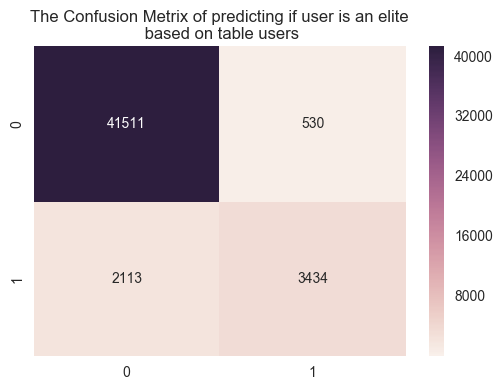

In [741]:
sns.heatmap(cm, vmin=0.8, annot=True, fmt='d')
plt.title('The Confusion Metrix of predicting if user is an elite\n based on table users')

In [737]:
coefs = pd.DataFrame({'coef':lr_4.coef_[0], 'abs_coef':np.abs(lr_4.coef_[0]),
                      'variable':[x for x in users.columns if not x in ['yelping_since','elite','name','user_id', 'is_elite']]})
coefs.sort_values('abs_coef', ascending=False, inplace=True)

In [738]:
coefs[:20]

,abs_coef,coef,variable
9,0.870993,-0.870993,average_stars
3,0.091947,0.091947,compliments_writer
4,0.074489,0.074489,fans
10,0.054639,0.054639,compliments_more
14,0.027441,-0.027441,compliments_photos
7,0.019081,0.019081,compliments_cool
15,0.015012,-0.015012,compliments_funny
1,0.011343,0.011343,review_count
12,0.008952,0.008952,compliments_list
5,0.007218,-0.007218,compliments_note


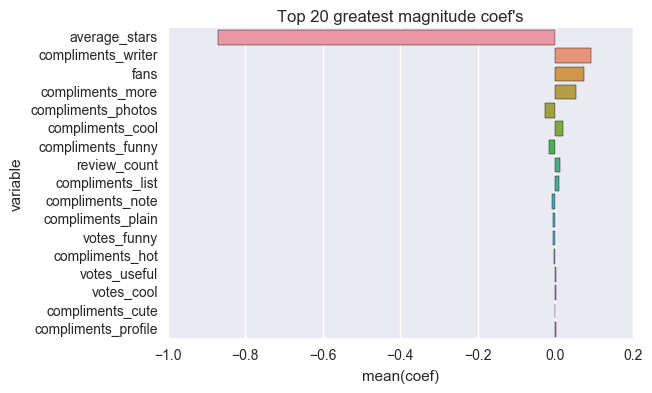

In [739]:
sns.barplot(x= 'coef', y = 'variable', data = coefs[:20])
plt.title("Top 20 greatest magnitude coef's")
plt.show()

### Part 2 : 
In this part, we try to predict if user is elite, based on the review that we have in table reviews. we should assume that some users have been elite in some specified years. so we need determine if the user is elite in that year or not

In [570]:
def expand_elite(row):

    for elite_year in eval(row['elite']):
        row[str(elite_year)] = 1
    return row

users_wide = users.apply(expand_elite, axis=1)

In [571]:
users_wide = users_wide.fillna(0)

In [602]:
users_long = pd.melt(users_wide,id_vars=['user_id'],var_name='year',value_name='is_elite_in_year',
                    value_vars=['2005','2006','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
users_long

,user_id,year,is_elite_in_year
0,dMeSxE7S6Yxhz3cBgd6Sjw,2005,0.0
1,c-e0BxGy3eNtKzKDrrHyGw,2005,0.0
2,tO-IKvmHn9kGobTcVweTeA,2005,0.0
3,soPELsow5JAqNSYCUmntJg,2005,0.0
4,RR6dZa6dkrcgjKvEnI-Myw,2005,0.0
5,QlZcJoNxBqT4Mc9MDZrBsA,2005,0.0
6,CslyedYDBFOVhLkfXd4K0w,2005,0.0
7,ndxvx9-h-OGccs-GmmBrMw,2005,0.0
8,2Sy0_vujNiX1SAZofg6vEg,2005,0.0
9,7LLi1Uz_rTH1tpUO4G7l1A,2005,0.0


In [603]:
reviews['year'] = pd.DatetimeIndex(pd.to_datetime(reviews['date'])).year.astype('str')

In [604]:
reviews_merged = reviews.merge(users_long,how='left', on=['user_id','year'])

In [605]:
reviews_merged

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,date_1,year,variable,is_elite_in_year
0,elpRcMJAh_VkK3A1BDWx_g,2KeNKCRDsylngITNf0Ivcw,0,gGfK9Qq9gSQf_4gr5aS4IA,0,5,2012-06-08,0,0,0,...,0,0,0,0,0,0,2012-06-08,2012,2012,0.0
1,tH2J16siXZ4rsCd_t_yRrg,_bmQ5pAz2d_Scb33Cxd_xQ,0,af4saM2obxtAbYfItxb20A,0,5,2010-10-26,0,0,0,...,0,0,0,0,0,0,2010-10-26,2010,2010,0.0
2,nQRSe5epQntGJy7UCmJvZA,OP1QisWYiN5JhUJNLlzfXQ,0,af4saM2obxtAbYfItxb20A,0,5,2011-02-24,0,0,0,...,0,0,0,0,0,0,2011-02-24,2011,2011,0.0
3,24FtuDevca_MfKBJrlb1NQ,L9KKro_wToXxu4876gkndQ,0,pQSkGB3HIunzNn_vIRWUNQ,1,5,2012-09-06,0,0,0,...,0,0,0,0,0,0,2012-09-06,2012,2012,1.0
4,1IcTqBmeWCpey047zZ1lUA,zCcxiwovF0XxTBm5qARxKw,0,pQSkGB3HIunzNn_vIRWUNQ,0,5,2012-09-07,0,0,0,...,0,0,0,0,0,0,2012-09-07,2012,2012,0.0
5,4BU0M66MhgtmQgZ-1oXBCg,udQ9mOGOzE-x_tx7WyoKhw,0,pQSkGB3HIunzNn_vIRWUNQ,1,5,2015-03-21,0,0,0,...,0,0,0,0,0,0,2015-03-21,2015,2015,0.0
6,hebXGQk5ggZSwTlUoEcTWQ,k9hz50FRBbHbeJXiL-_F3Q,0,IPsG_71MD8pwB9i3TKOJYg,0,5,2015-01-01,0,0,0,...,0,0,0,0,0,0,2015-01-01,2015,2015,0.0
7,dQsDU-KcEYNrNgeoYNwdMw,Kir3pEz6dr9tpiKs42jjIw,0,mQfT3JYu18HN22DVylcE7A,0,5,2012-12-15,0,0,0,...,0,0,0,0,0,0,2012-12-15,2012,2012,0.0
8,F-iOCZDAJc9QvIqmyn3v7w,KB2tL-PCt2zvhZ-rlNA2KA,0,mQfT3JYu18HN22DVylcE7A,0,5,2015-03-30,0,0,0,...,0,0,0,0,0,0,2015-03-30,2015,2015,0.0
9,DlqWHu_YVdZmWzZtltqHcA,sxkC5kGnDKcNELH-MhXYNA,0,k8bSp5BfCNCKqTXcKALXtw,0,5,2014-08-12,0,0,0,...,0,0,0,0,0,0,2014-08-12,2014,2014,0.0


In [683]:
not_review_columns_for_elite = ['user_id','review_id', 'year', 'business_id','stars', 'date', 'variable', 'date_1', 'is_elite_in_year']


In [703]:
X.select_dtypes(include=['object'])

In [697]:
reviews_merged.year = reviews_merged.year.apply(int)

In [698]:
reviews_merged.minutes_30 = reviews_merged.minutes_30.apply(int)

In [699]:
reviews_merged.stars = reviews_merged.stars.apply(int)

In [709]:
reviews_merged = reviews_merged.fillna(0)

In [742]:
X = reviews_merged[[x for x in reviews_merged.columns if not x in not_review_columns_for_elite]]
y = reviews_merged['is_elite_in_year']


In [743]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [744]:
lr_42 = LogisticRegression()

lr_42.fit(X_train,y_train)
predictions = lr_42.predict(X_test)
score = lr_42.score(X_test,y_test)
score

0.81016837859387458

In [745]:
cm = confusion_matrix(y_test,predictions)

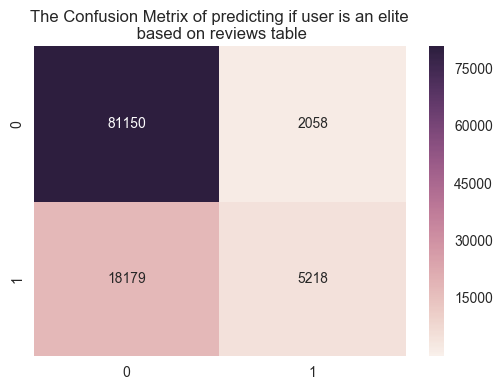

In [746]:
sns.heatmap(cm, vmin=0.8, annot=True, fmt='d')
plt.title('The Confusion Metrix of predicting if user is an elite\n based on reviews table')

In [747]:
coefs = pd.DataFrame({'coef':lr_42.coef_[0], 'abs_coef':np.abs(lr_42.coef_[0]),
                      'variable':[x for x in reviews_merged if not x in not_review_columns_for_elite]})
coefs.sort_values('abs_coef', ascending=False, inplace=True)

In [748]:
coefs[:20] 

,abs_coef,coef,variable
28,0.905566,-0.905566,food_amazing
13,0.655686,-0.655686,customer_service
45,0.584481,-0.584481,great_atmosphere
47,0.572128,-0.572128,great_food
32,0.511740,-0.511740,food_great
80,0.490719,0.490719,really_enjoyed
78,0.452496,0.452496,pretty_good
0,0.442446,0.442446,votes_cool
91,0.440875,0.440875,service_friendly
84,0.439100,-0.439100,recommend_place


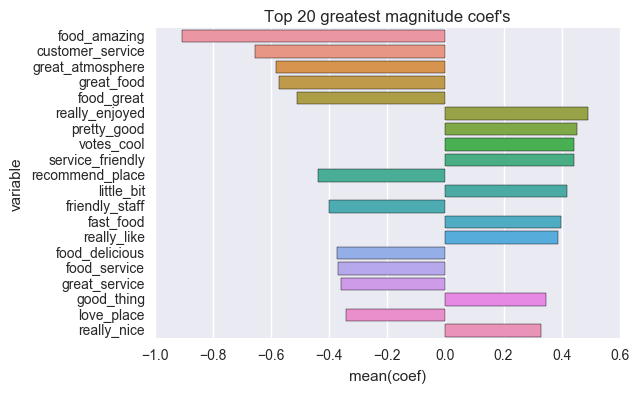

In [749]:
sns.barplot(x= 'coef', y = 'variable', data = coefs[:20])
plt.title("Top 20 greatest magnitude coef's")
plt.show()

# <center> Conclusion </center>

## Comparing the results from part1 (predicting based on users table) with part 2 (predicting based on reviews) shows that second prediction has less accuracy than first one. 

### i think main reason is because yelp uses both reviews and tips table together but i have used only reviews table in this problem. the other reason is about the model i have used (Logistic regression) or feature engineering